# Day 1 - Christmas & New Year Songs

credits: https://alenakot.github.io/dataviz-advent-calendar-2025/

# Импорт библиотек

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Предобработка данных

In [2]:
df = pd.read_csv('christmas_new_year_songs.csv')
df.head()

,Song_Title,Artist,Release_Year,Total_Streams_Billions,Holiday_Type,Genre,Language,Country_of_Origin
0,All I Want for Christmas Is You,Mariah Carey,1994,2.0+,Christmas,Pop,English,United States
1,Last Christmas,Wham!,1984,1.77,Christmas,Pop,English,United Kingdom
2,Rockin' Around the Christmas Tree,Brenda Lee,1958,1.0+,Christmas,Rock n Roll,English,United States
3,Jingle Bell Rock,Bobby Helms,1957,1.0+,Christmas,Rockabilly,English,United States
4,It's the Most Wonderful Time of the Year,Andy Williams,1963,0.9,Christmas,Traditional Pop,English,United States


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Song_Title              30 non-null     object
 1   Artist                  30 non-null     object
 2   Release_Year            30 non-null     object
 3   Total_Streams_Billions  29 non-null     object
 4   Holiday_Type            30 non-null     object
 5   Genre                   30 non-null     object
 6   Language                30 non-null     object
 7   Country_of_Origin       30 non-null     object
dtypes: object(8)
memory usage: 2.0+ KB


In [4]:
df['Release_Year'].unique()

array(['1994', '1984', '1958', '1957', '1963', '2014', '2011', '1970',
       '2013', '2017', '1953', '1942', '1959', '1979', '1975', '1971',
       '2021', '1961', '1700s', '2010', '1980', '1947'], dtype=object)

In [5]:
df['Release_Year'] = df['Release_Year'].replace('1700s', '1700').astype('int')
df['Total_Streams_Billions'] = df['Total_Streams_Billions'].str.replace('+', '').astype('float')

df = df.dropna(subset = ['Total_Streams_Billions'])

df['Composition'] = df['Song_Title'] + ' by ' + df['Artist']
ranked_data = df.sort_values(by = ['Total_Streams_Billions'], ascending = False)[:10]

# Визуализация данных

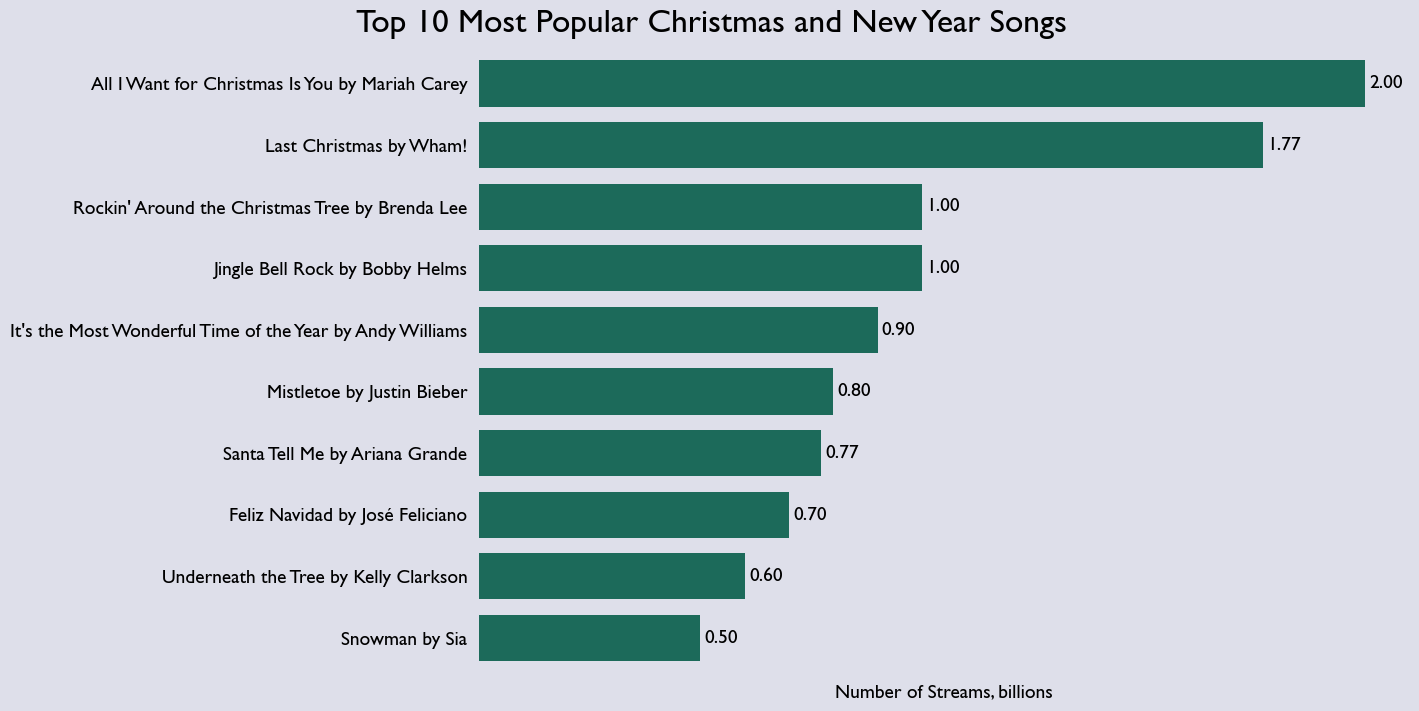

In [6]:
def set_seaborn_style(background_color, text_color, font_family):
    sns.set_style({
        "axes.facecolor": background_color,
        "figure.facecolor": background_color,

        "axes.grid": False,

        "axes.labelcolor": text_color,
        "text.color": text_color,
        "font.family": font_family,
        "ytick.color": text_color,

        "xtick.bottom": False,
        "xtick.top": False,
        "ytick.left": False,
        "ytick.right": False,

        "axes.spines.left": False,
        "axes.spines.bottom": False,
        "axes.spines.right": False,
        "axes.spines.top": False
    }
)

background_color = '#dedfea'
text_color = '#000000'
chart_color = '#1c6a5a'
font_family = 'Gill Sans MT'

set_seaborn_style(
    background_color = background_color,
    text_color = text_color,
    font_family = font_family
)

fig = plt.figure(figsize=(12, 8))

barchart = sns.barplot(
    y = ranked_data['Composition'],
    x = ranked_data['Total_Streams_Billions'],
    orient = 'h',
    saturation = 1,
    color = chart_color,
    width = 0.75
)

title = plt.title("Top 10 Most Popular Christmas and New Year Songs", fontsize = 24, pad = 15, x = 0.25)

barchart.set_xlabel('Number of Streams, billions', fontsize = 14)
barchart.set_ylabel('')

barchart.tick_params("y", labelsize=14, pad = 5)

barchart.set_xticklabels([])

barchart.bar_label(barchart.containers[0], padding = 3, fmt = '%0.2f', fontsize = 14)

plt.show()